# Scaling Data

Normaly used before applying supervised machine learning algorithms.
It is necessary to scale the training and test set on the same way (fitting on the training and transforming both)

- Standart Scaler: bring all features to the same magnetude, where mean = 0 and variance =1 
- Robust Scaler: Median and quartiles (instead of mean and variance)
- MinMaxScaler: put the data between 0 and 1
- Normalize: transform the data such as each data point has euclidean length of 1 

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt

In [60]:
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test= tts(cancer.data,cancer.target, random_state=0)

In [61]:
X_train.shape

(426, 30)

In [62]:
X_test.shape

(143, 30)

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

In [68]:
# Fitting to the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

Text(0, 0.5, 'values')

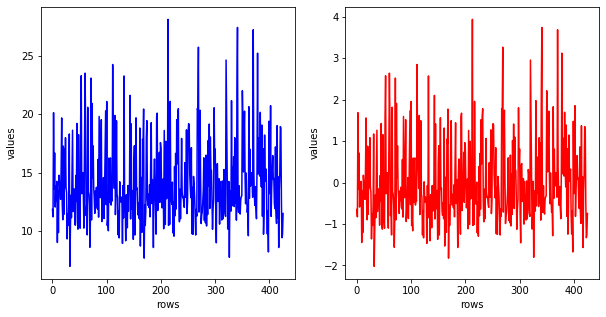

In [69]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(np.arange(len(X_train[:,0])),X_train[:,0], 'blue', label = 'Data without treatment' )
ax[1].plot(np.arange(len(X_train_sc[:,0])),X_train_sc[:,0], 'red', label  ='Data with scaling method')
ax[0].set_xlabel('rows')
ax[0].set_ylabel('values')
ax[1].set_xlabel('rows')
ax[1].set_ylabel('values')

In [70]:
from sklearn.svm import SVC

classifier= SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.904
Test set score:0.937


In [71]:
from sklearn.svm import SVC

classifier= SVC()
classifier.fit(X_train_sc, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train_sc, y_train),
                                                                classifier.score(X_test_sc, y_test)))

Training set score:0.986
Test set score:0.965
